# Eurovision 2018 Predictions

In [1]:
from nlp_functions import *

/Users/danaiavg/anaconda/lib/python2.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [2]:
eurovision_data = pd.read_csv('./eurovision_.csv')

## Term Frequency

In [3]:
# removing duplicates
eurovision_data = eurovision_data.drop_duplicates(subset=['tweet'], keep='first')
# applying tokenizer 
eurovision_data["tokenized_tweet"] = eurovision_data['tweet'].apply(tokenizer)

In [4]:
# manually removing duplicates that were not captured
eurovision_data = eurovision_data[eurovision_data.tweet.str.contains("RT BBCSteveR") == False]
# term frequency
term_frequency = eurovision_data['tokenized_tweet'].str.split(expand=True).stack().value_counts().head(10)
print('##term frequency##')
print(term_frequency)

##term frequency##
song         98
final        74
esc          73
year         65
like         58
allaboard    55
time         51
earli        48
vote         45
tonight      44
dtype: int64


In [5]:
val_counts = eurovision_data['tokenized_tweet'].str.split(expand=True).stack().value_counts()
val_counts_df = pd.DataFrame({'index':val_counts.index, 'values':val_counts.values})

In [6]:
data = [go.Bar(
            x=val_counts_df['index'][:10],
            y=val_counts_df['values'][:10]
    )]

layout = go.Layout(
    autosize = False,
    title = "Term Frequency",
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=17,
        )
    ),
   
    xaxis = dict(
        title='Term',
        titlefont=dict(
            size=17,
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(titlefont=dict(size=20))
iplot(fig)

## Sentiment Analysis

In [7]:
eurovision_data = tweet_sentiment(eurovision_data, 'tweet')

## TFI-DF

In [8]:
eurovision_data['tok'] = eurovision_data['tokenized_tweet'].str.split()

In [9]:
tfidf = tweet_tfidf(eurovision_data, 'tokenized_tweet', 20)
tfidf

,term,weight
601,esc,0.021180
2112,year,0.020721
1116,like,0.020614
550,earli,0.019182
1441,point,0.017789
999,israel,0.017360
717,final,0.017230
45,allaboard,0.017040
1842,time,0.015945
1997,vote,0.014898


In [10]:
data = [go.Bar(
            x=tfidf['term'][:15],
            y=tfidf['weight'][:15]
    )]

layout = go.Layout(
    autosize = False,
    title = "Term Frequency",
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=17,
        )
    ),
   
    xaxis = dict(
        title='Term',
        titlefont=dict(
            size=17,
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(titlefont=dict(size=20))
iplot(fig)

## LDA- Topic modelling

In [11]:
topics, ldamodel, corpus, dictionary = tweet_topic_modelling(eurovision_data, 'tok', 9)

In [12]:
print('##Common Topics##')
for i in topics:
    print(i)

##Common Topics##
song perform earli just
esc odd live rank
israel allaboard year win
song time earli like
final allaboard semi tonight
like year watch vote
point card final vote
bbc radio point watch
song year time final


In [13]:
data = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
data

/Users/danaiavg/anaconda/lib/python2.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      13.943269        1       1  0.038130  0.121651
1      13.716801        1       2 -0.141027  0.052896
5      13.608363        1       3  0.120835  0.002048
8      11.955659        1       4  0.006930 -0.035601
2      10.498299        1       5 -0.041528 -0.093582
0       9.378837        1       6  0.078135  0.060929
4       9.175158        1       7 -0.072371 -0.025478
6       8.987270        1       8 -0.042084  0.034504
7       8.736340        1       9  0.052981 -0.117367, topic_info=     Category       Freq          Term      Total  loglift  logprob
term                                                               
1939  Default  20.000000           odd  20.000000  30.0000  30.0000
2141  Default  54.000000         final  54.000000  29.0000  29.0000
1667  Default  28.000000         point  28.000000  28.0000  28.0000
2411  Default  40.000000     allaboard  40.000000  27.0000  27.0000
245   Default  12.000000          rank  12.000000  26.0000  26.0000
881   Default  13.000000          card  13.000000  25.0000  25.0000
1786  Default  25.000000          semi  25.000000  24.0000  24.0000
2095  Default  25.000000          cest  25.000000  23.0000  23.0000
1360  Default  28.000000        israel  28.000000  22.0000  22.0000
2404  Default  54.000000           esc  54.000000  21.0000  21.0000
908   Default  33.000000          vote  33.000000  20.0000  20.0000
1967  Default  24.000000           win  24.000000  19.0000  19.0000
533   Default   9.000000           plu   9.000000  18.0000  18.0000
345   Default  27.000000         watch  27.000000  17.0000  17.0000
1274  Default  10.000000            tt  10.000000  16.0000  16.0000
675   Default   9.000000         trend   9.000000  15.0000  15.0000
447   Default  21.000000       perform  21.000000  14.0000  14.0000
698   Default  10.000000          juri  10.000000  13.0000  13.0000
1712  Default  35.000000         earli  35.000000  12.0000  12.0000
2130  Default   9.000000         start   9.000000  11.0000  11.0000
330   Default   8.000000         radio   8.000000  10.0000  10.0000
1284  Default  72.000000          song  72.000000   9.0000   9.0000
1060  Default  10.000000           key  10.000000   8.0000   8.0000
1485  Default   7.000000        portug   7.000000   7.0000   7.0000
1677  Default   8.000000            pt   8.000000   6.0000   6.0000
726   Default  28.000000          live  28.000000   5.0000   5.0000
2161  Default  10.000000           bet  10.000000   4.0000   4.0000
193   Default   8.000000         espaa   8.000000   3.0000   3.0000
634   Default  38.000000          time  38.000000   2.0000   2.0000
93    Default  11.000000          join  11.000000   1.0000   1.0000
...       ...        ...           ...        ...      ...      ...
1133   Topic9   0.761231          blog   1.404561   1.8251  -6.6236
2413   Topic9   4.185544         stage   8.327888   1.7497  -4.9191
2277   Topic9   3.496422  finaleurovis   6.966446   1.7483  -5.0990
2281   Topic9   5.556750           bbc  14.292768   1.4929  -4.6357
491    Topic9   3.822514  nickifrenchi   8.587255   1.6283  -5.0099
1274   Topic9   4.186417            tt  10.474110   1.5206  -4.9189
2244   Topic9   2.863518         statu   6.343670   1.6423  -5.2987
1788   Topic9   2.816197     amaiaalfr   6.211650   1.6466  -5.3154
979    Topic9   2.816164          beti   6.211750   1.6466  -5.3154
881    Topic9   4.185926          card  13.803284   1.2445  -4.9190
796    Topic9   2.128427          talk   4.240110   1.7485  -5.5954
1273   Topic9   2.816624            tv   7.768847   1.4231  -5.3152
1667   Topic9   5.342570         point  28.913168   0.7491  -4.6751
1860   Topic9   4.259693            uk  19.641459   0.9092  -4.9016
345    Topic9   4.807520         watch  27.224977   0.7037  -4.7806
1179   Topic9   2.131564            oh   5.708302   1.4526  -5.5939
1360   Topic9   3.633830       

In [14]:
lda_corpus = ldamodel[corpus]

In [15]:
documents = eurovision_data['tokenized_tweet'].tolist()

In [16]:
dictionary_of_topics = {}
for k in range(len(topics)):
    k_texts = []
    for i, j in zip(lda_corpus,documents):
        for l in i:
            if l[0] == k:
                k_texts.append((l[1], j))
    dictionary_of_topics[topics[k]] = k_texts

In [17]:
def cluster_assignment(text):
    tops = []
    for i in topics:
        for j in dictionary_of_topics[i]:
            if text in j:
                tops.append((j[0], i))
    max1 = 0
    best_topic = ''
    for k in tops:
        if k[0] > max1:
            max1 = k[0]
            best_topic = k[1]
    return [best_topic, max1]

In [18]:
eurovision_data['topic'] = eurovision_data['tokenized_tweet'].apply(cluster_assignment)

In [19]:
eurovision_data['score'] = eurovision_data['topic'].str[1]
eurovision_data['topic'] = eurovision_data['topic'].str[0]

## Country Frequency

In [20]:
# country list feature creation
eurovision_data['countries_mentioned'] = eurovision_data['tok'].apply(country_feature)

In [21]:
country_mentioned_frequency = list(chain.from_iterable(eurovision_data['countries_mentioned'].tolist()))

In [22]:
dict1 = Counter(country_mentioned_frequency)
val_counts_df = pd.DataFrame({'index':list(dict1.keys()), 'values':list(dict1.values())}).sort_values(by=['values'], ascending=False)
data = [go.Bar(
            x=val_counts_df['index'][:10],
            y=val_counts_df['values'][:10]
    )]

layout = go.Layout(
    autosize = False,
    title = "Term Frequency",
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=17,
        )
    ),
   
    xaxis = dict(
        title='Term',
        titlefont=dict(
            size=17,
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(titlefont=dict(size=20))
iplot(fig)

# Analysis

In [38]:
israel = eurovision_data[eurovision_data.countries_mentioned.apply(lambda x: 'israel' in x)]

In [43]:
topics, ldamodel, corpus, dictionary = tweet_topic_modelling11(israel, 'tok', 3)

In [44]:
print('##Common Topics##')
for i in topics:
    print(i)

##Common Topics##
israel palestinian kill vote
israel esc entri year
israel time year watch


In [45]:
lda_corpus = ldamodel[corpus]
documents = eurovision_data['tokenized_tweet'].tolist()

In [46]:
list_ = []
for i, j in zip(lda_corpus, documents):
    max_ = 0
    for k in i:
        if k[1] > max_:
            max_ = k[1]
            ind = k[0]
    list_.append((ind, j))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21e0f090>]],
      dtype=object)

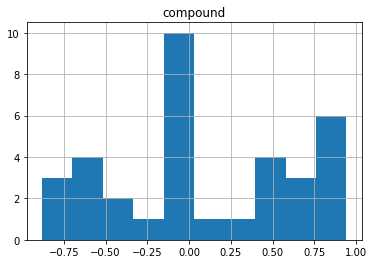

In [28]:
israel.hist(column='compound', bins=10)